In [2]:
import pandas as pd

file_path = 'data.xlsx'
df = pd.read_excel(file_path)

work_context_columns = [col for col in df.columns if '[工作情景]' in col]

df_work_context = df[work_context_columns]

df_long_format = df_work_context.melt(var_name='Item', value_name='Score')

print(df_long_format)

output_file_path = 'work_context_data.xlsx'
df_long_format.to_excel(output_file_path, index=False)


                                                 Item     Score
0   1 - I would be quite bored by a visit to an ar...  3.909091
1   2 - I clean my office or home quite frequently...  6.454545
2   3 - I rarely hold a grudge, even against peopl...  4.909091
3   4 - I feel reasonably satisfied with myself ov...  5.636364
4   5 - I would feel afraid if I had to travel in ...  3.636364
..                                                ...       ...
95  96 - I want people to know that I am an import...  3.727273
96  97 - I have sympathy for people who are less f...  4.818182
97  98 - I try to give generously to those in need...  5.272727
98  99 - It would not bother me to harm someone I ...  2.000000
99  100 - People see me as a hard-hearted person. ...  3.272727

[100 rows x 2 columns]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   number               60 non-null     int64  
 1   Mean_SocialD         60 non-null     float64
 2   Trait                60 non-null     object 
 3   Reversed             60 non-null     int64  
 4   Text                 60 non-null     object 
 5   normal_human.mean    60 non-null     float64
 6   old_people.mean      60 non-null     float64
 7   persona_GPT3.5.mean  60 non-null     float64
 8   shape_GPT3.5.mean    60 non-null     float64
 9   persona_GPT4.mean    60 non-null     float64
 10  shape_GPT4.mean      60 non-null     float64
 11  persona_LLaMA3.mean  60 non-null     float64
 12  shape_LLaMA3.mean    60 non-null     float64
dtypes: float64(9), int64(2), object(2)
memory usage: 6.2+ KB
None


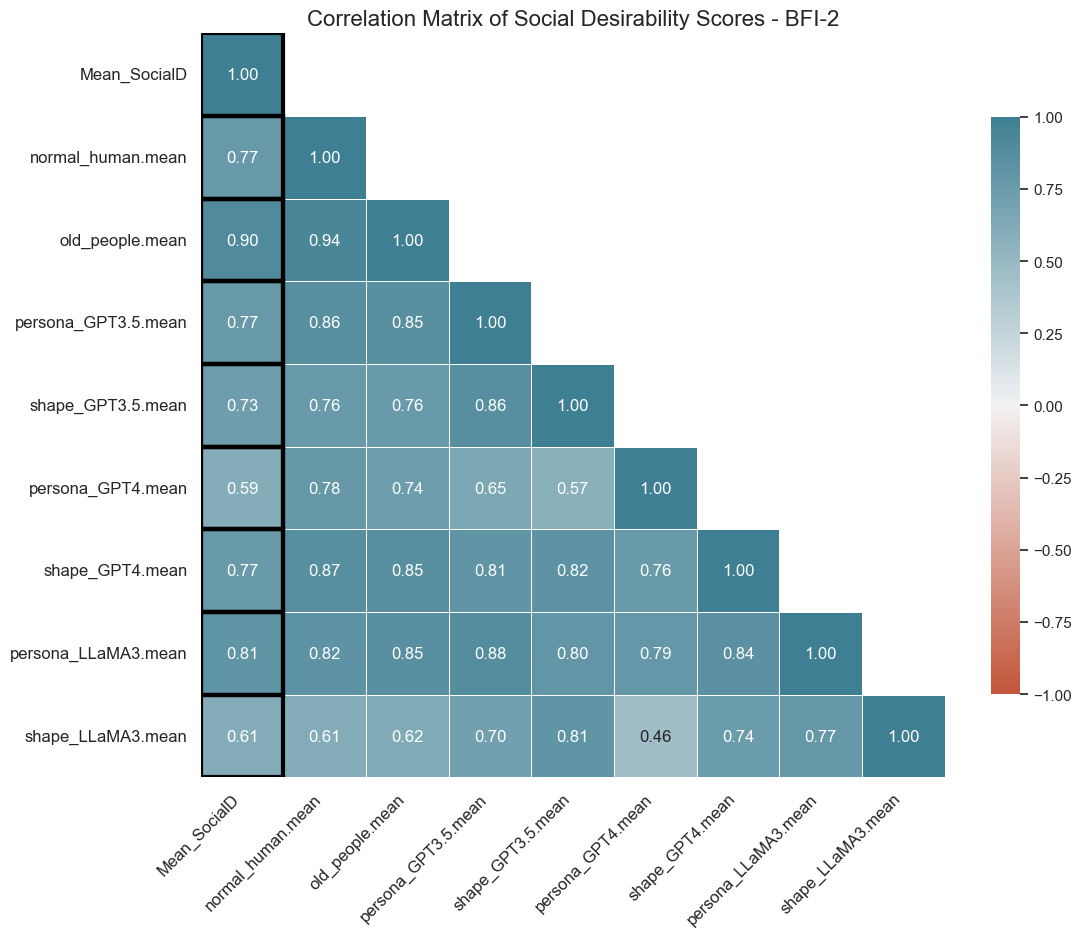

Correlation between Mean_SocialD and normal_human.mean: 0.767, p-value: 9.321e-13
Correlation between Mean_SocialD and old_people.mean: 0.905, p-value: 3.678e-23
Correlation between Mean_SocialD and persona_GPT3.5.mean: 0.773, p-value: 4.853e-13
Correlation between Mean_SocialD and shape_GPT3.5.mean: 0.733, p-value: 2.695e-11
Correlation between Mean_SocialD and persona_GPT4.mean: 0.595, p-value: 5.406e-07
Correlation between Mean_SocialD and shape_GPT4.mean: 0.765, p-value: 1.066e-12
Correlation between Mean_SocialD and persona_LLaMA3.mean: 0.805, p-value: 9.019e-15
Correlation between Mean_SocialD and shape_LLaMA3.mean: 0.608, p-value: 2.563e-07


In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

data_social_desirability = pd.read_csv("Data/social_desirability.csv")


print(data_social_desirability.info())

corr_matrix = data_social_desirability[['Mean_SocialD', 'normal_human.mean', 'old_people.mean', 
                                        'persona_GPT3.5.mean', 'shape_GPT3.5.mean', 
                                        'persona_GPT4.mean', 'shape_GPT4.mean', 
                                        'persona_LLaMA3.mean', 'shape_LLaMA3.mean']].corr()


mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

sns.set(style='white')

plt.figure(figsize=(12, 10))

cmap = sns.diverging_palette(20, 220, as_cmap=True)

sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .75})

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if 'Mean_SocialD' in [corr_matrix.columns[i], corr_matrix.columns[j]]:
            plt.gca().add_patch(plt.Rectangle((i, j-1), 1, 1, fill=False, edgecolor='black', lw=3))
for i in range(len(corr_matrix.columns)):
    if 'Mean_SocialD' in corr_matrix.columns[i]:
        for j in range(len(corr_matrix.columns)):
            if i != j:
                plt.gca().add_patch(plt.Rectangle((i, j), 1, 1, fill=False, edgecolor='black', lw=3))

plt.title('Correlation Matrix of Social Desirability Scores - BFI-2', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

variables = ['normal_human.mean', 'old_people.mean', 'persona_GPT3.5.mean', 'shape_GPT3.5.mean', 
             'persona_GPT4.mean', 'shape_GPT4.mean', 'persona_LLaMA3.mean', 'shape_LLaMA3.mean']

for var in variables:
    corr, p_value = pearsonr(data_social_desirability['Mean_SocialD'], data_social_desirability[var])
    print(f'Correlation between Mean_SocialD and {var}: {corr:.3f}, p-value: {p_value:.3e}')



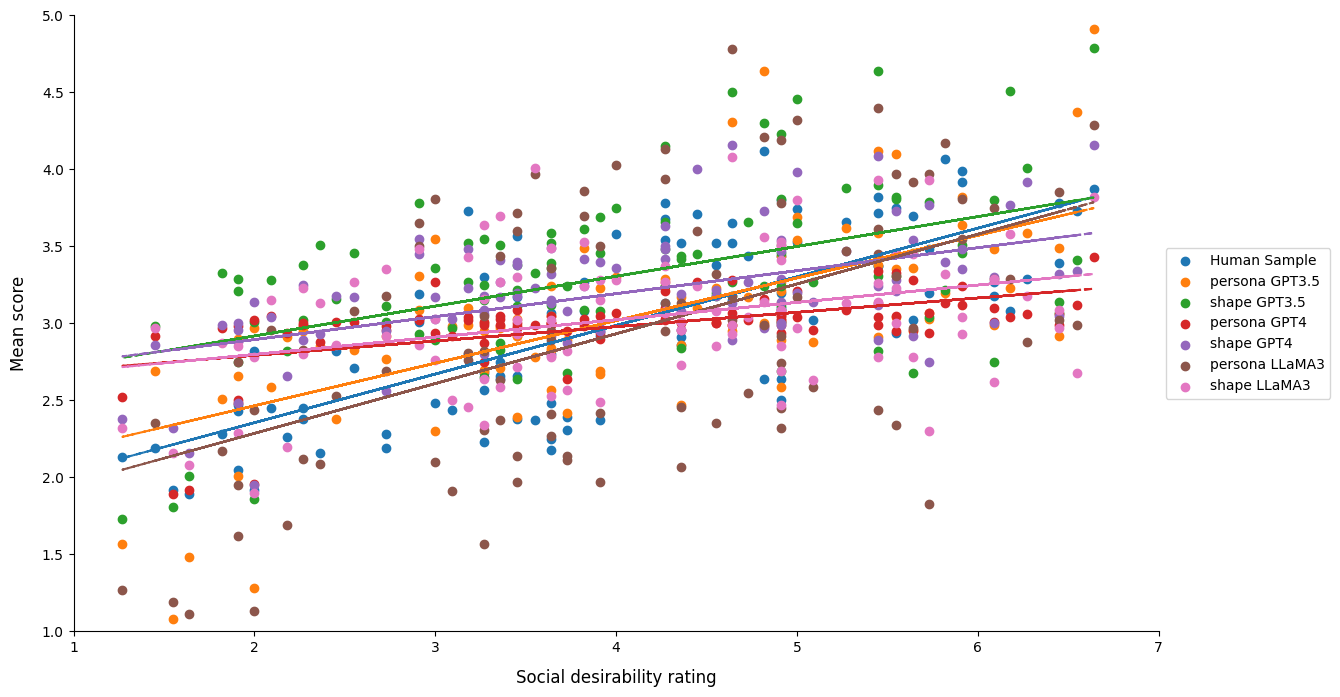

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = 'HEXACO_social_desirability.csv'
data = pd.read_csv(file_path)

columns_to_plot = {
    "normal_human.mean": "Human Sample",
    "persona_GPT3.5.mean": "persona GPT3.5",
    "shape_GPT3.5.mean": "shape GPT3.5",
    "persona_GPT4.mean": "persona GPT4",
    "shape_GPT4.mean": "shape GPT4",
    "persona_LLaMA3.mean": "persona LLaMA3",
    "shape_LLaMA3.mean": "shape LLaMA3"
}

plt.figure(figsize=(14, 8))

for col, label in columns_to_plot.items():
    plt.scatter(data["Mean_SocialD"], data[col], label=label)
    
    z = np.polyfit(data["Mean_SocialD"], data[col], 1)
    p = np.poly1d(z)
    plt.plot(data["Mean_SocialD"], p(data["Mean_SocialD"]), linestyle='--')

plt.xlim(1, 7)
plt.ylim(1, 5)

plt.xlabel('Social desirability rating', fontsize=12, labelpad=10)
plt.ylabel('Mean score', fontsize=12, labelpad=10)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('')

ax = plt.gca()

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.grid(False)

plt.show()


